# EDA

## Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [5]:
data = pd.read_csv('../data/merged_data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,wave_height,dominant_period,avg_period,dominant_wave_direction_sin,dominant_wave_direction_cos,wave_height_1.0_h,dominant_period_1.0_h,avg_period_1.0_h,dominant_wave_direction_sin_1.0_h,dominant_wave_direction_cos_1.0_h,...,wave_height_9.0_h,dominant_period_9.0_h,avg_period_9.0_h,dominant_wave_direction_sin_9.0_h,dominant_wave_direction_cos_9.0_h,score,wind_speed,gust_speed,wind_direction_sin,wind_direction_cos
0,2.56,11.76,9.82,-0.681998,0.731354,2.52,13.33,9.60,-0.669131,0.743145,...,2.94,13.33,10.56,-0.719340,0.694658,6.440000,0.60,1.05,0.410719,0.911762
1,2.46,13.33,9.98,-0.681998,0.731354,2.40,13.33,9.99,-0.669131,0.743145,...,2.80,14.29,10.01,-0.731354,0.681998,7.266667,0.28,0.82,0.671721,-0.740805
2,2.20,12.50,9.79,-0.681998,0.731354,2.56,11.76,9.82,-0.681998,0.731354,...,2.71,13.33,9.84,-0.681998,0.731354,7.223333,0.20,0.78,0.972776,-0.231748
3,2.33,11.76,9.75,-0.681998,0.731354,2.46,13.33,9.98,-0.681998,0.731354,...,2.67,13.33,9.67,-0.694658,0.719340,15.180000,0.28,0.70,0.829038,0.559193
4,2.48,11.76,10.13,-0.529919,0.848048,2.20,12.50,9.79,-0.681998,0.731354,...,2.65,14.29,9.92,-0.719340,0.694658,4.786667,0.52,0.90,-0.923210,0.384295


## Pairplot

<Figure size 576x864 with 0 Axes>

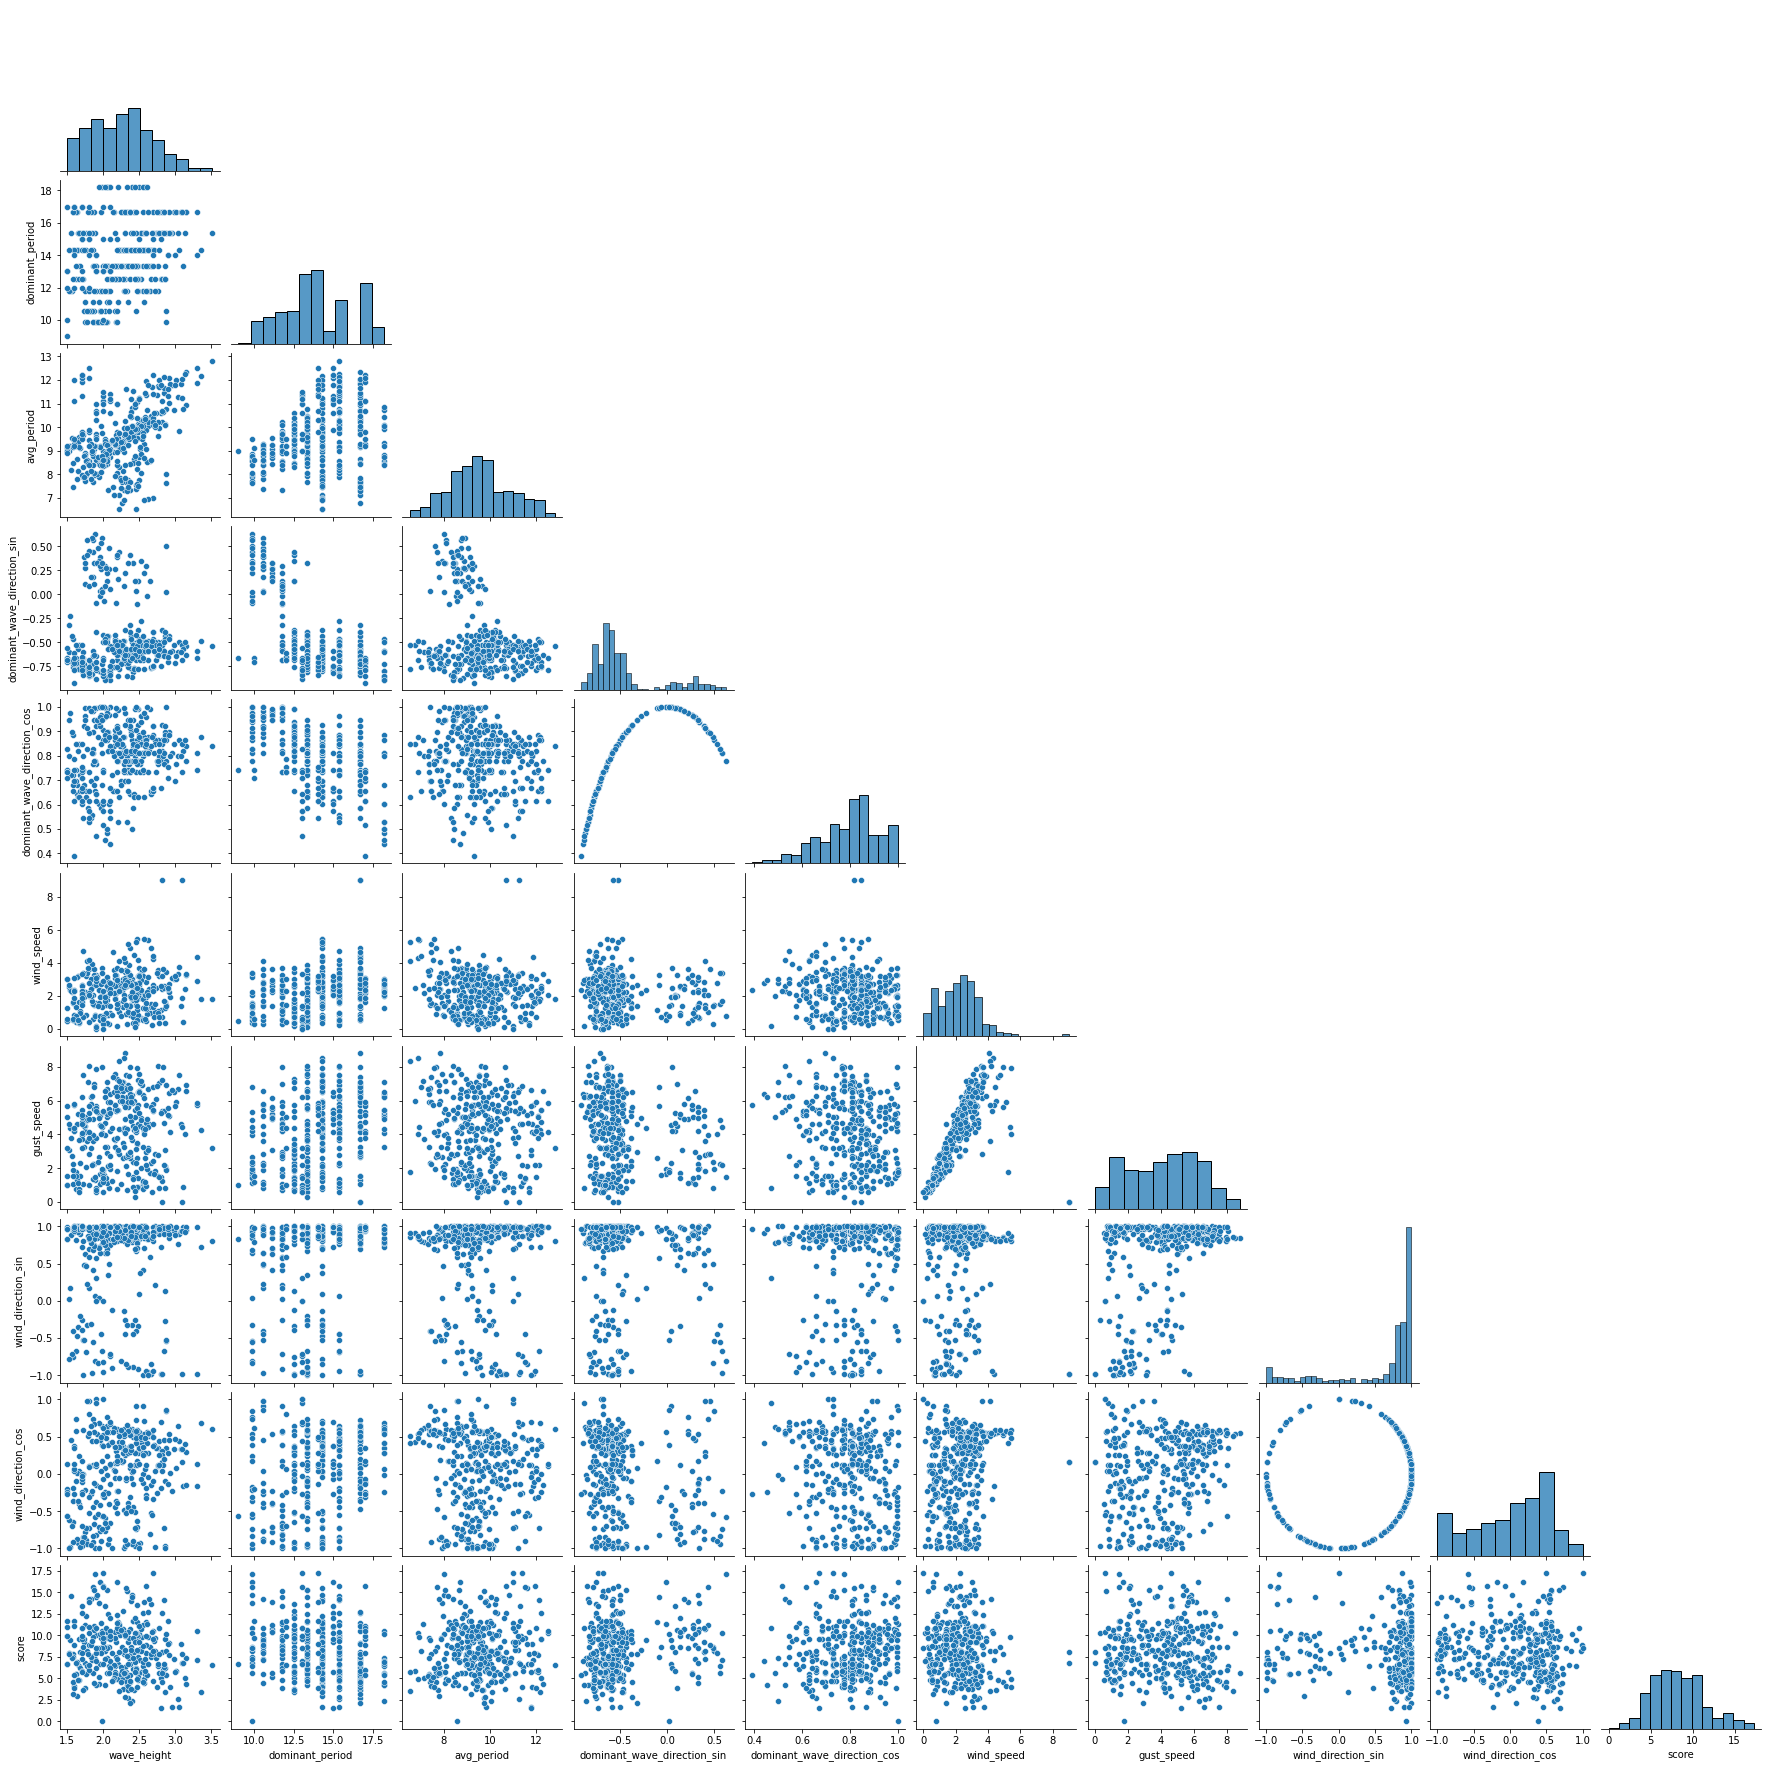

In [6]:
plt.figure(figsize=(8, 12))
sns.pairplot(
    data=data[
        [
            "wave_height",
            "dominant_period",
            "avg_period",
            "dominant_wave_direction_sin",
            "dominant_wave_direction_cos",
            "wind_speed",
            "gust_speed",
            "wind_direction_sin",
            "wind_direction_cos",
            "score",
        ]
    ],
    corner=True,
);


In [9]:
data.corr()['score'].sort_values().head(10)

dominant_period_6.0_h   -0.290794
dominant_period_3.0_h   -0.262250
dominant_period_1.5_h   -0.256876
dominant_period         -0.235003
dominant_period_1.0_h   -0.233901
dominant_period_9.0_h   -0.223908
wave_height_3.0_h       -0.130201
wave_height             -0.126441
wave_height_1.0_h       -0.114815
wind_speed              -0.104216
Name: score, dtype: float64

In [10]:
data.corr()['score'].sort_values(ascending=False).head(10)

score                                1.000000
avg_period_9.0_h                     0.199619
dominant_wave_direction_sin          0.161917
avg_period_6.0_h                     0.159199
dominant_wave_direction_sin_6.0_h    0.150756
dominant_wave_direction_sin_9.0_h    0.143119
dominant_wave_direction_sin_1.0_h    0.140229
dominant_wave_direction_sin_1.5_h    0.133282
dominant_wave_direction_sin_3.0_h    0.123102
dominant_wave_direction_cos_9.0_h    0.117964
Name: score, dtype: float64

## Water temperature

Water temperature and its offsets appear to be highly correlated to my target, but very evenly distributed. It is also not considered an important factor in surf forecasting and wave quality. Therefore I will go back and eliminate this feature.